Started: 
1/20/2022


In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
import anndata as ad
import PyPDF2
import matplotlib.pyplot as plt
import statistics

#TMS Adata Files
adata_processed = "/mnt/ibm_sm/home/lea.mcgeever/ms/notebooks/adata_files/adata_processed.h5ad"
adata = sc.read_h5ad(adata_processed)


sc.settings.verbosity = 3             
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.8 pynndescent==0.5.5


In [3]:
tissues = ['Aorta',
 'BAT',
 'Bladder',
 'Brain_Myeloid',
 'Brain_Non-Myeloid',
 'Diaphragm',
 'GAT',
 'Heart',
 'Kidney',
 'Large_Intestine',
 'Limb_Muscle',
 'Liver',
 'Lung',
 'MAT',
 'Mammary_Gland',         
 'Marrow',
 'Pancreas',
 'SCAT',
 'Skin',
 'Spleen',
 'Thymus',
 'Tongue',
 'Trachea'
                   ]

In [4]:
mt_genes = [
    "mt-Atp6",
    "mt-Atp8",
    "mt-Co1",
    "mt-Co2",
    "mt-Co3",
    "mt-Cytb",
    "mt-Nd1",
    "mt-Nd2",
    "mt-Nd3",
    "mt-Nd4",
    "mt-Nd4l",
    "mt-Nd5",
    "mt-Nd6",
    "mt-Rnr1",
    "mt-Rnr2",
    "mt-Ta",
    "mt-Te",
    "mt-Tf",
    "mt-Ti",
    "mt-Tl1",
     "mt-Tl2",
    "mt-Tm",
    "mt-Tp",
    "mt-Tq",
    "mt-Tt",
    "mt-Tv"
]

MitoCarta3.0 is an inventory of 1136 human and **1140 mouse genes** encoding proteins with strong support of mitochondrial localization, now with sub-mitochondrial compartment and pathway annotations.
https://www.broadinstitute.org/files/shared/metabolism/mitocarta/mouse.mitocarta3.0.html

In [7]:
'''MitoCarta3.0 Mouse Genes'''

mitocarta3_path = "/mnt/ibm_sm/home/lea.mcgeever/ms/notebooks/Mouse mt-genes.csv"
mitocarta3_csv = pd.read_csv(mitocarta3_path)#delimiter=" "
mitocarta3_df=pd.DataFrame(mitocarta3_csv)

mt_nc_genes = mitocarta3_df['Gene_symbol'].values.tolist()


In [8]:
len(mt_nc_genes)

20631

In [9]:
help(sc.tl.score_genes)#takes two lists, G1 & G2 genes, NC & MT gene lists instead


Help on function score_genes in module scanpy.tools._score_genes:

score_genes(adata: anndata._core.anndata.AnnData, gene_list: Sequence[str], ctrl_size: int = 50, gene_pool: Union[Sequence[str], NoneType] = None, n_bins: int = 25, score_name: str = 'score', random_state: Union[NoneType, int, numpy.random.mtrand.RandomState] = 0, copy: bool = False, use_raw: Union[bool, NoneType] = None) -> Union[anndata._core.anndata.AnnData, NoneType]
    Score a set of genes [Satija15]_.
    
    The score is the average expression of a set of genes subtracted with the
    average expression of a reference set of genes. The reference set is
    randomly sampled from the `gene_pool` for each binned expression value.
    
    This reproduces the approach in Seurat [Satija15]_ and has been implemented
    for Scanpy by Davide Cittaro.
    
    Parameters
    ----------
    adata
        The annotated data matrix.
    gene_list
        The list of gene names used for score calculation.
    ctrl_size
   

In [10]:
sc.tl.score_genes_cell_cycle(adata,mt_nc_genes, mt_genes)
#mt_nc_genes = S_score
#mt_genes = g2m_genes

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    391 total control genes are used. (0:00:12)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    312 total control genes are used. (0:00:07)
-->     'phase', cell cycle phase (adata.obs)


In [11]:
genes_not_included = ['Gatd3a', 'Micos10', 'Fdx2', 'Mmut', 'Atp5pb', 'Mtarc2', 'Micos13', 'Mtres1', 'Coa8', 'Tmlhe', 'Mtarc1', 'Prxl2a', 'Dhrsx', 'Marchf5', 'Fbh1', 'Tle5', 'Mars1', 'Mrtfb', 'Prxl2c', 'Dmac2l', 'Atp5md', 'Eef1aknmt', 'Dnaaf4', 'Antkmt', 'Tmem223', 'Ciao3', 'Prxl2b', 'Septin9', 'Ldc1', 'Abitram', 'Gcn1', 'Obi1', 'Acsbg3', 'Cby2', 'Slc66a1', 'Niban3', 'Entr1', 'Ctage5', 'Atpsckmt', 'Marchf7', 'Elapor1', 'Marchf2', 'Eif4a3l1', 'Iqca1l', 'Fem1al', 'Potegl', 'Ddx39a', 'A26c3', 'Ilrun', 'Tent2', 'Marchf10', 'Aadacl2fm2', 'Fcsk', 'Cilk1', 'Septin7', 'Insyn2b', 'Kash5', 'Elapor2', 'Cfap410', 'Pgap4', '1500012F01Rik', 'Mrtfa', 'Rskr', 'Septin12', 'Krt85', 'Septin11', 'Septin3', 'Septin8', 'Septin4', 'Septin5', 'Septin2', 'H4c8', 'H2ab2', 'Dipk1a', 'Cemip2', 'Czib', 'H2ac1', 'Skp1', 'Lgals6', 'Itprip', 'Marchf11', 'Gfus', 'Pate11', 'Cfap47', 'Tasor', 'Radx', 'Fam166c', '1700094D03Rik', 'Cracdl', 'Efcab15', 'Prorp', 'Ciao2a', 'Cracd', 'Cep20', 'Cypt7', 'Cypt9', 'Rps23rg1', 'Ct55', 'Gask1b', 'Pacrgl', 'Il4i1b', 'Gm2083', 'Aadacl2fm3', 'Aadacl4fm2', 'AAdacl4fm3', 'Aadacl4fm1', 'Marchf4', 'Aadacl4fm5', 'Ftdc1', 'Marchf3', 'Pak5', 'Aadacl4fm4', 'Aadacl2fm1', 'Fads2b', 'Apbb3', 'Ftdc2', 'Marchf6', 'Marchf9', 'Cgas', 'Tent4b', 'Septin10', 'Cplane2', 'Meak7', 'Marchf1', 'Sting1', 'Mtrex', 'Aopep', '2010001E11Rik', 'Mab21l4', 'Marchf8', 'Cert1', 'Slc66a2', 'Septin1', 'Dcaf8l', 'Egfbp2', 'Dop1b', 'Vps35l', 'Vamp7', 'Get1', 'Ero1a', 'H2ab1', 'H2ab3', 'A730008H23Rik', 'Myorg', 'Golm2', 'Erdr1', 'Dop1a', 'H2bc1', 'H2ax', 'Hbb-b2', 'Ciao2b', 'H2bc4', 'Get3', 'Naa80', 'Bpnt2', 'LOC100861978', 'Dux', 'Macroh2a2', 'Qrfprl', 'Mageb11', 'Crppa', 'Nscme3l', 'Ms4a19', 'H2bl1', 'Plaat5', 'Gm38423', 'Pate7', 'Pate10', 'Pate8', 'Fam177a2', 'Gvin2', 'Pramel47', 'Pramel42', 'G630090E17Rik', 'Pramel51', 'Gm8787', 'Samt1b', 'LOC666331', 'Pramel50', 'Cypt10', 'Cypt8', 'Dear1', 'Nrp', 'Pate12', 'Insyn2a', 'Pramel15', 'Pramel30', 'Pramel14', 'Samt1d', 'Samt1c', 'Gm16367', 'Pramel17', 'Gm5820', 'D830031N03Rik', 'Cibar2', 'Iho1', 'Pate9', 'Gvin3', 'Pramel31', 'Cdin1', 'Pramel37', 'Pttg1ip2', 'Pramel34', 'Pramel32', 'Pramel26', 'Gm1604b', 'Pramel19', 'Pramel39', 'Pramel20', 'Pramel16', 'Pramel48', 'Shfl', 'Pramel21', 'Pramel22', 'Pramel24', 'Pwwp3b', 'Gask1a', 'Pramel12', 'Mgat4f', 'Pate14', 'Hoatz', 'Rusf1', 'Katnip', 'Garre1', 'Map11', 'A830010M20Rik', 'Niban2', 'Dpcd', 'Minar2', 'Slc49a4', 'Hrob', 'Rxylt1', '4932411E22Rik', 'Wmp', 'Minar1', 'Fsip2l', 'Bnip5', 'Pramel11', 'Pramel25', 'Pramel27', 'Flacc1', 'Ezhip', 'Psme3ip1', 'Pramel29', 'Lypd8l', 'Pramel13', 'Pate5', 'Spring1', 'Pramex1', '4930564C03Rik', 'Samt2b', 'Tex55', 'Cfap20dc', 'Nudt16l2', 'Tasl', 'H1f7', 'Fam174c', 'Rbis', 'Pate6', 'Iftap', 'Cibar1', 'Tmem179b', 'H2ap', 'Ly6m', 'Pacc1', 'Spertl', 'Niban1', 'H1f9', 'Tgoln2', 'Pira7', 'Pira6', 'Pira4', 'Pira11', 'Pira1', 'H1f4', 'Itprid1', 'Elp1', 'Plaat3', 'Tasor2', 'H1f1', 'Tlcd3b', 'Macroh2a1', 'Ccn1', 'Cblif', 'Brd8dc', 'Naip7', 'Ren2', 'Stimate', 'Eola1', 'Dipk1b', 'Lypd10', 'Cyrib', 'Lypd11', 'Ero1b', 'Septin6', 'Mtss2', 'H2az2', 'Hjv', 'Ccn4', 'Vps26c', 'Ccl21d', 'A430107P09Rik', 'H2-Ea', 'Gm1987', 'Micalcl', 'Gm38425', 'Gm14436', 'Gm44504', 'Vmn1r242', 'Spopfm2', 'Vmn1r259', 'Vmn1r258', 'Vmn1r256', 'Vmn1r253', 'Vmn1r250', 'Vmn1r248', 'Vmn1r247', 'Vmn1r246', 'Vmn1r243', 'Tdpoz7', 'Olfr1565', 'Thoc2l', 'Defa40', 'Defa41', 'H4c17', 'Gm2506', 'Vmn1r187', 'Vmn1r186', 'Gm2002', 'Cstdc6', 'Cstdc5', 'Muc21', 'Tdpoz9', 'Gm14432', 'Vmn1r260', 'Vmn1r257', 'Vmn1r255', 'Vmn1r254', 'Vmn1r251', 'Vmn1r252', 'Defa43', 'Defa42', 'H2bc24', 'H2bc23', 'H2ac23', 'Zpld2', 'Gm15386', 'Klra33', 'Defa38', 'Mageb5b', 'Ctag2l2', 'Ctag2l1', 'Gm14430', 'Albfm1', 'Gm6289', 'H2ac21', 'Vmn1r241', 'Vmn1r240', 'Gpr52', 'Taf7l2', 'Ear12', 'Btg1b', 'Vmn1r244', 'Vmn1r245', 'Vmn1r249', 'Cstdc4', 'Vmn1r207', 'Csta3', 'Olfr242', 'Olfr257', 'Olfr100', 'V1rd18', 'Lypd9', 'Lratd2', 'Adam34l', 'Foxl3', 'Defa39', 'Spef1l', 'Clec2m', 'Slc28a2b', 'H3c1', 'Dnaaf6b', 'Tafa3', 'Ccn6', 'H4c2', 'H4c1', 'Tafa4', 'H4f16', 'Tafa1', 'H2ac19', 'H2ac13', 'H2bc21', 'H2bc18', 'H2bc22', 'H2bc15', 'H2bc14', 'H2bc13', 'H2bc12', 'H2bc11', 'H2bc9', 'H2bc8', 'H2bc7', 'H2bc6', 'H2bc3', 'H2ac20', 'H2ac10', 'H2ac4', 'H2ac24', 'H2ac22', 'H2ac15', 'H2ac12', 'H2ac11', 'H2ac8', 'H2ac7', 'H2ac6', 'H2aw', 'H4c18', 'H4c12', 'H4c11', 'H4c9', 'H4c6', 'H4c4', 'H4c3', 'H3c13', 'H3c11', 'H3c10', 'H3c6', 'H3c2', 'H3c4', 'H3c3', 'Mageb6b1', 'Tafa2', 'H3c7', 'Olfr329', 'Olfr175', 'Olfr176', 'Olfr1213', 'Olfr900', 'Olfr237', 'Olfr899', 'Olfr208', 'Olfr1274', 'Olfr391', 'Olfr1182', 'Olfr426', 'Olfr207', 'Dennd11', 'H1f10', 'Zfp267', 'Dipk1c', 'Mideas', 'Trarg1', 'Tesl1', 'Spry3', 'Tlcd5', 'H2aj', 'Klrh1', 'Klhl17', 'Tdpoz8', 'S100a7l2', 'Utp25', 'Btg1c', 'H1f8', 'Tlcd3a', 'Csprs', 'H2-Q9', 'H1f6', 'Tafa5', 'Lratd1', 'Tlcd4', 'H3c8', 'H4c14', 'H3c15', 'Klra19', 'Klra18', 'Klra22', 'Klra21', 'Klra23', 'Ecrg4', 'Cstdc1', 'H2bu2', 'Cstdc2', 'Denn2b', 'Cyria', 'Csta2', 'Oga', 'Dipk2b', 'Magea13', 'Cep43', 'Dnaaf6', 'Magec2', 'Magea14', 'Septin14', 'Kifbp', 'LTO1', 'Poglut2', 'Cdcp3', 'Magea9', 'Itprid2', 'Doxl1', 'H2bw2', 'Ms4a20', 'Ccnq', 'Dipk2a', 'Poglut3', 'Pwwp3a', 'Dennd10', 'Bmerb1', 'Ramac', 'Nt5el', 'Ppp1r14bl', 'Ccl21c', 'Pgap6', 'H1f5', 'Znrd2', 'Ear4', 'Ear3', 'Ear7', 'Macir', 'H2az1', 'H1f2', 'Klra15', 'Plaat1', 'Prl2c4', 'Ccn5', 'Vmn2r122', 'Vmn2r123', 'Ro60', 'Raet1c', 'Raet1b', 'Raet1a', 'Ntn3', 'Ccn3', 'Klra12', 'H2ac18', 'Hbb-b1', 'H3c14', 'H2-T9', 'H2-Q8', 'H2-L', 'H1f3', 'Ccn2', 'Defa6', 'Defa4', 'Pcdha10', 'Art2a', 'Ang3', 'Htd2', 'Pigbos1']

len(genes_not_included)

549

In [12]:
varcellgenes = list(set(adata.var.index))

The score is the average expression of a set of genes subtracted with the
    average expression of a reference set of genes. The reference set is
    randomly sampled from the `gene_pool` for each binned expression value.

In [1]:
#mt_nc_genes = S_score
#mt_genes = g2m_genes


In [14]:
bebe = list(adata.obs['G2M_score'])
#mt_genes = g2m_genes
sorted(bebe)[-1]

2.8376938349161396

In [15]:
'''Nuclear encoded & MT encoded MT gene expression scores'''

#add a range function to shorted test?

def NC_MT_exp_score(adata):
    ''' Input is adata object. Output is a pandas DataFrame 
    of the MT and NC encoded MT genes'''
    
    MT_genes = [] #mt_genes = g2m_genes
    NC_genes = [] #mt_nc_genes = S_score
    tissue_tracker = []
    cell_type_list = []
    age = []
      
    for i,l in enumerate(list(adata.obs.index)):
        mt = list(adata.obs['G2M_score'])#mt genes
        nc = list(adata.obs['S_score'])#nc genes
        a = list(adata.obs['age'])
        t = list(adata.obs['tissue'])
        c = list(adata.obs['cell_ontology_class'])

        MT_genes.append(mt[i])
        NC_genes.append(nc[i])
        age.append(a[i])
        tissue_tracker.append(t[i])
        cell_type_list.append(c[i])
        
    dict_NC_MT_gene_scores = {'Tissue':tissue_tracker,
                                'Cell Type':cell_type_list,
                                'MT score': MT_genes,
                                'NC score': NC_genes,
                                'Age': age
                                }
    df = pd.DataFrame(dict_NC_MT_gene_scores)
    return df

In [ ]:
adata_thymus = adata[adata.obs['tissue'] == "Thymus"]
adata_thymus_mac = adata_thymus[adata_thymus.obs['cell_ontology_class'] == "macrophage"]
adata_thymus3 = adata_thymus_mac[adata_thymus_mac.obs['age'] == "3m"]
adata_thymus18 = adata_thymus_mac[adata_thymus_mac.obs['age'] == "18m"]
adata_thymus24 = adata_thymus_mac[adata_thymus_mac.obs['age'] == "24m"]
#
#
#

#g2m_genes = mt endcoded genes
#S_score = nc encoded mt genes, mitocarta3.0

In [18]:
'''A dictionary of tissues to cell type'''

celltypes_in_tissues_dict = {}

for t in tissues:
    adata_t = adata[adata.obs['tissue'] == t]
    celltypes_in_tissues_dict.update({t:set(list(adata_t.obs.cell_ontology_class))})

In [19]:
'''Dictionary of Macrophages by Tissue'''

macrophages_in_tissues = {'Aorta':{'macrophage'},
                         'BAT':{},
                         'Bladder':{},
                         'Brain_Myeloid':{'macrophage', 'microglial cell'},
                         'Brain_Non-Myeloid':{'macrophage', 'microglial cell'},
                         'Diaphragm':{'macrophage'},
                         'GAT':{} ,
                         'Heart':{'macrophage'},
                         'Kidney':{'macrophage'},
                         'Large_Intestine':{} ,
                         'Limb_Muscle':{'macrophage'},
                         'Liver':{'Kupffer cell'},
                         'Lung':{'lung macrophage'},
                         'MAT':{'macrophage'},
                         'Mammary_Gland': {},         
                         'Marrow':{'macrophage'},
                         'Pancreas':{} ,
                         'SCAT':{} ,
                         'Skin':{'macrophage'},
                         'Spleen':{} ,
                         'Thymus':{'macrophage'},
                         'Tongue':{} ,
                         'Trachea':{'macrophage'}
                        }

In [20]:
def adata_subset_by_age(adata_ob, age_m):
    '''Takes adata object and string 3m, 18m, 21m or 24m
    Outputs an adata subset by assigned age'''
    
    return adata_ob[adata_ob.obs['age'] == age_m]

In [21]:
def adata_subset_by_tissue(adata_age_subset, tissue):
    '''Takes adata subsetted by age, and a string of desired tissue type
    Returns a subset of inputted tissue'''
    return adata_age_subset[adata_age_subset.obs['tissue']==tissue] 

**Subet by age**

In [22]:
adata_3m = adata_subset_by_age(adata,'3m')
adata_18m = adata_subset_by_age(adata,'18m')
adata_21m = adata_subset_by_age(adata,'21m')
adata_24m = adata_subset_by_age(adata,'24m')

adata_ages = [adata_3m, adata_18m, adata_24m]

* [X] maybe do a list of adata subset by age. funnel into dataframe.


* probably should try to make it without the list.


* [X] but try starting with the list and you can


* step back and expand code so that adata is all you need for input.


**use your adata_subset_by_age function.**

**Function that outputs pandas DataFrame of macrophages across tissue cell types**

In [23]:
'''VERSION 2.0'''
#change so input is macrophages_in_tissues dictionary

adata_ages = [adata_3m, adata_18m, adata_24m]

macrophages_in_tissues #dictionary

def cell_type_per_tissue2(dictionary):
    ''' Input is cell type. Output is a pandas DataFrame 
    of the percentage of that cell type across tissues'''
        
    tissue_tracker = []
    cell_type_count = []
    tissue_count = []
    cell_type_list = []
    sample_age = []
    cell_per_tissue = []
    f_sex = []
    m_sex = []
    
    
    for k,v in dictionary.items():#going through keys/tissue types
        for celltype in v:#going through values/celltypes
            for a in adata_ages:#then going through tissue type by age           
                d = a[a.obs['tissue']== k]#have an adata filtered by tissue & age
                e = d[d.obs['cell_ontology_class']== celltype]#have an adata filtered by tissue, age & cell_type
            
                if e.n_obs > 0:
                    cell_type_count.append(e.n_obs)
                    tissue_tracker.append(k)
                    cell_type_list.append(celltype)
                    sample_age.append(str(e.obs.age[0]))
                    tissue_count.append(d.n_obs)
                    cell_per_tissue.append((e.n_obs/d.n_obs)*100)
                    
                    f_percent = (len(list(e[e.obs['sex']== 'female'])))/(e.n_obs)
                    m_percent = (len(list(e[e.obs['sex']== 'male'])))/(e.n_obs)
                    
                    f_sex.append(f_percent*100)
                    m_sex.append(m_percent*100)
    
    
    dict_cell_type_per_tissue = {
                                'Tissue':tissue_tracker,
                                'Cell Type':cell_type_list,
                                'Cell Count':cell_type_count,
                                'Tissue Count':tissue_count,
                                'Cell Type/Tissue %':cell_per_tissue,
                                'Age': sample_age, 
                                'F Sex %': f_sex,
                                'M Sex %': m_sex
                                }
    df = pd.DataFrame(dict_cell_type_per_tissue)
    return df
                


In [24]:
mac_in_tissues = cell_type_per_tissue2(macrophages_in_tissues)


In [25]:
mac_in_tissues

,Tissue,Cell Type,Cell Count,Tissue Count,Cell Type/Tissue %,Age,F Sex %,M Sex %
0,Aorta,macrophage,25,366,6.830601,3m,32.000000,68.000000
1,Aorta,macrophage,1,316,0.316456,18m,100.000000,0.000000
2,Aorta,macrophage,6,224,2.678571,24m,0.000000,100.000000
3,Brain_Myeloid,microglial cell,4390,4434,99.007668,3m,50.911162,49.088838
4,Brain_Myeloid,microglial cell,4375,4461,98.072181,18m,55.040000,44.960000
5,Brain_Myeloid,microglial cell,4267,4424,96.451175,24m,0.000000,100.000000
6,Brain_Myeloid,macrophage,44,4434,0.992332,3m,29.545455,70.454545
7,Brain_Myeloid,macrophage,86,4461,1.927819,18m,51.162791,48.837209
8,Brain_Myeloid,macrophage,157,4424,3.548825,24m,0.000000,100.000000
9,Brain_Non-Myeloid,microglial cell,136,3051,4.457555,18m,31.617647,68.382353


<AxesSubplot:xlabel='Tissue', ylabel='Cell Type/Tissue %'>

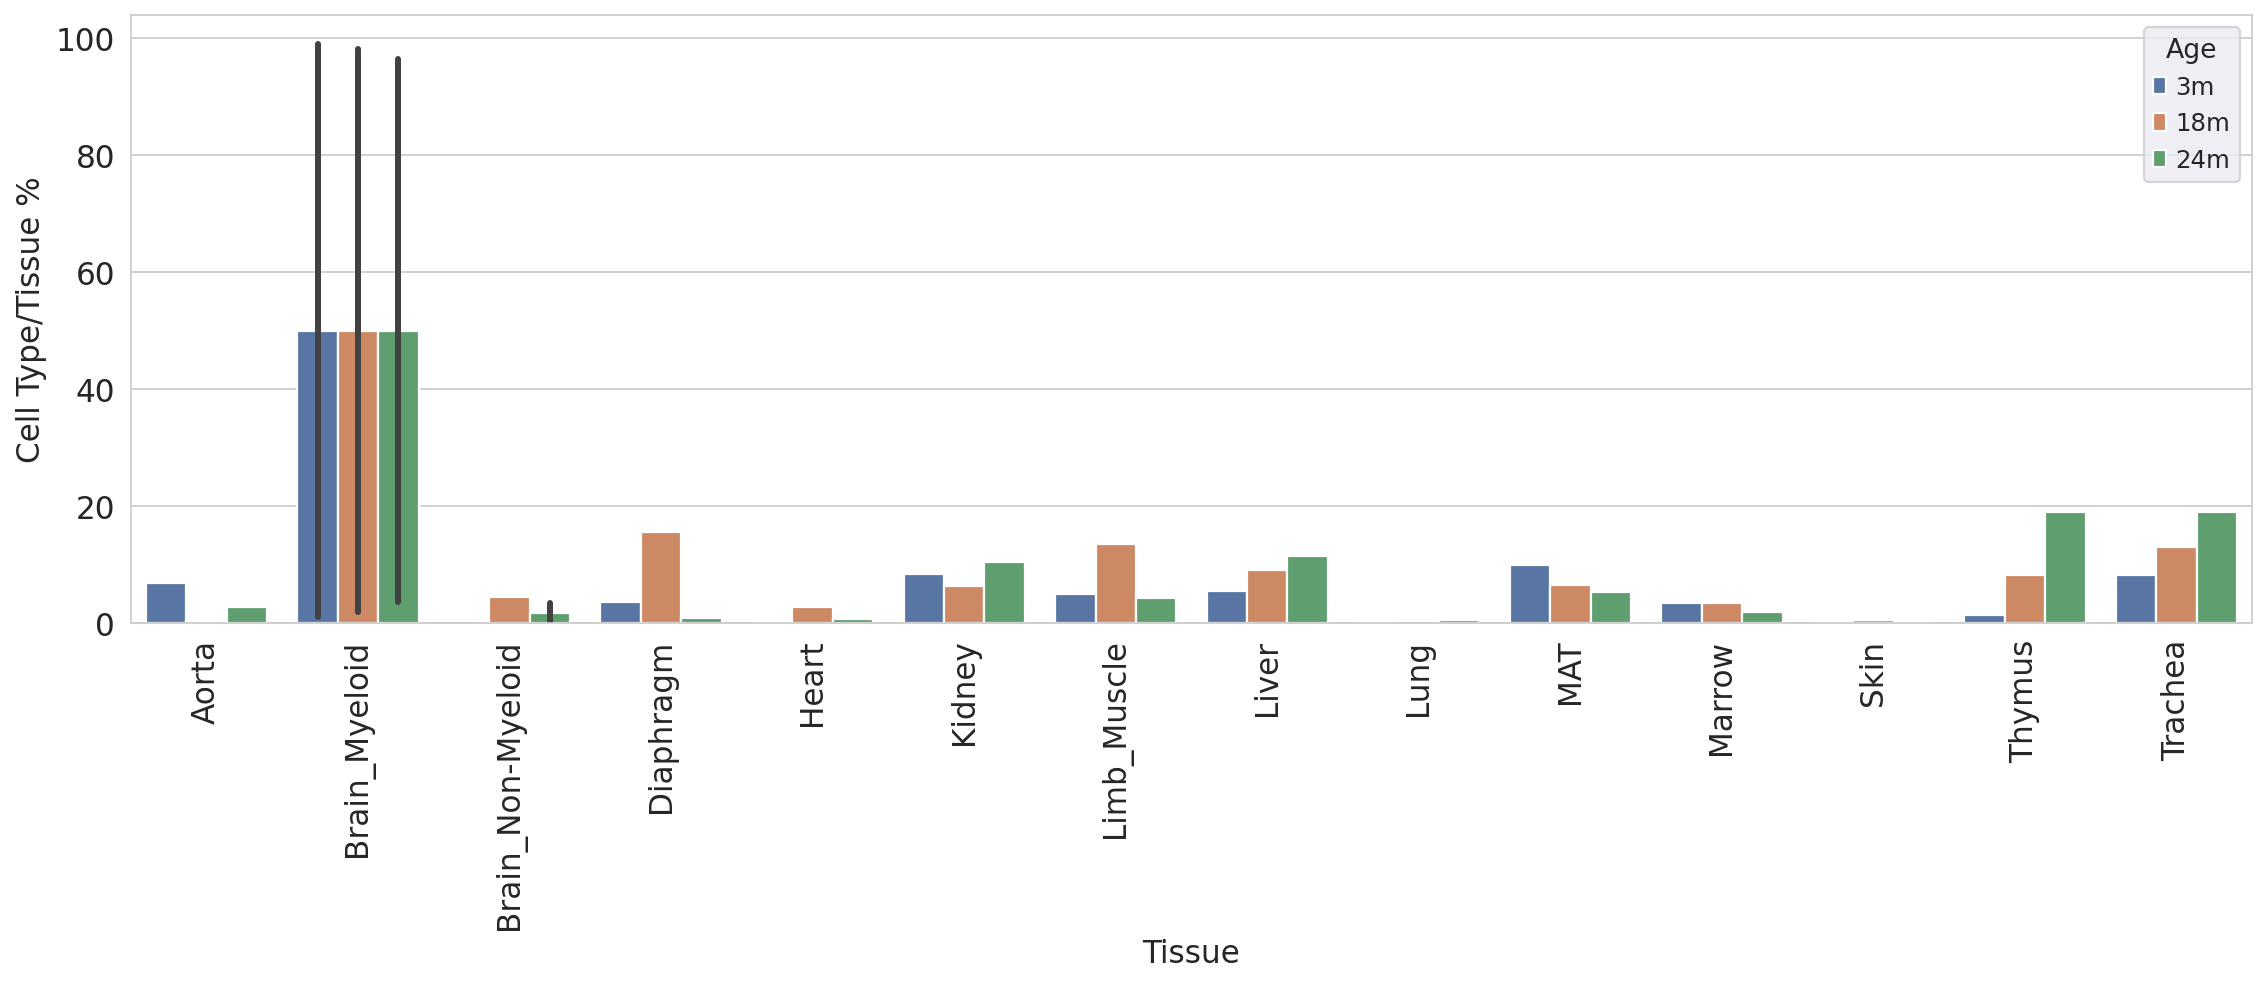

In [26]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(17, 5))
plt.xticks(rotation=90)
sns.set(font_scale =1)
#set_title("MT Expression Across Tissue & Age")
sns.barplot(y="Cell Type/Tissue %",x="Tissue",data=mac_in_tissues, hue = "Age")

In [27]:
'''Pt. 1 Comparing macrophages_in_tissues pandas dataframe values to adata values for validation'''

mac_in_tissues_DF = cell_type_per_tissue2(macrophages_in_tissues)

#Diaphragm 24m Tissue Subset
adata_24m_Diaphragm = adata_24m[adata_24m.obs['tissue'] == "Diaphragm"]
adata_24m_Diaphragm_macrophage= adata_24m_Diaphragm[adata_24m_Diaphragm.obs['cell_ontology_class'] == "macrophage"]

#Tissue
a = (mac_in_tissues_DF.iloc[[14],0]).item()
b = adata_24m_Diaphragm_macrophage.obs.tissue[0]

#Cell Type
c = (mac_in_tissues_DF.iloc[[14],1]).item()
d = adata_24m_Diaphragm_macrophage.obs.cell_ontology_class[0]

#Cell Count
e = (mac_in_tissues_DF.iloc[[14],2]).item()
f = adata_24m_Diaphragm_macrophage.n_obs

#Tissue Count
g = (mac_in_tissues_DF.iloc[[14],3]).item()
h = adata_24m_Diaphragm.n_obs

#Cell Type/Tissue %
i = (mac_in_tissues_DF.iloc[[14],4]).item()
num = (adata_24m_Diaphragm_macrophage.n_obs / adata_24m_Diaphragm.n_obs)
j = num*100

#Age
k = (mac_in_tissues_DF.iloc[[14],5]).item()
l = adata_24m_Diaphragm_macrophage.obs.age[0]

#Age
m = (mac_in_tissues_DF.iloc[[14],6]).item()
n = (len(list(adata_24m_Diaphragm_macrophage[adata_24m_Diaphragm_macrophage.obs['sex']== 'female'])))/(adata_24m_Diaphragm_macrophage.n_obs)*100

#Age
o = (mac_in_tissues_DF.iloc[[14],7]).item()
p = (len(list(adata_24m_Diaphragm_macrophage[adata_24m_Diaphragm_macrophage.obs['sex']== 'male'])))/(adata_24m_Diaphragm_macrophage.n_obs)*100

if a==b and c==d and e==f and g==h and i==j and k==l and m==n and o==p:
    print('You are not a fraud')

You are not a fraud


In [28]:
'''Pt. 2 Comparing macrophages_in_tissues pandas dataframe values to adata values for validation'''

mac_in_tissues_DF = cell_type_per_tissue2(macrophages_in_tissues)

#Aorta 3m Tissue Subset
adata_3m_Aorta = adata_3m[adata_3m.obs['tissue'] == "Aorta"]
adata_3m_Aorta_macrophage= adata_3m_Aorta[adata_3m_Aorta.obs['cell_ontology_class'] == "macrophage"]

#Tissue
a = (mac_in_tissues_DF.iloc[[0],0]).item()
b = adata_3m_Aorta_macrophage.obs.tissue[0]

#Cell Type
c = (mac_in_tissues_DF.iloc[[0],1]).item()
d = adata_3m_Aorta_macrophage.obs.cell_ontology_class[0]

#Cell Count
e = (mac_in_tissues_DF.iloc[[0],2]).item()
f = adata_3m_Aorta_macrophage.n_obs

#Tissue Count
g = (mac_in_tissues_DF.iloc[[0],3]).item()
h = adata_3m_Aorta.n_obs

#Cell Type/Tissue %
i = (mac_in_tissues_DF.iloc[[0],4]).item()
num = (adata_3m_Aorta_macrophage.n_obs / adata_3m_Aorta.n_obs)
j = num*100

#Age
k = (mac_in_tissues_DF.iloc[[0],5]).item()
l = adata_3m_Aorta_macrophage.obs.age[0]

if a==b and c==d and e==f and g==h and i==j and k==l:
    print('You are not a fraud')

You are not a fraud


In [29]:
'''VERSION 1.0'''
adata_ages = [adata_3m, adata_18m, adata_24m]

macrophages_in_tissues
#change so input is macrophages_in_tissues dictionary

def cell_type_per_tissue(cell_type):
    ''' Input is cell type. Output is a pandas DataFrame of the percentage of that cell type across tissues'''
        
    tissue_tracker = []
    cell_type_count = []
    tissue_count = []
    cell_type_list = []
    sample_age = []
    cell_per_tissue = []
    
    for t in tissues:#going through tissue types
        for a in adata_ages:#then doing tissue type by age
            d = a[a.obs['tissue']== t]#have an adata filtered by tissue & age
            e = d[d.obs['cell_ontology_class']== cell_type]#have an adata filtered by tissue, age & cell_type
            #now i'm throwing macrophage count into a list 
            #& tissue count into a list to the put into a dataframe
            
            if e.n_obs > 0:
                cell_type_count.append(e.n_obs)
                tissue_tracker.append(t)
                cell_type_list.append(cell_type)
                sample_age.append(str(e.obs.age[0]))
                tissue_count.append(d.n_obs)
                cell_per_tissue.append((e.n_obs/d.n_obs)*100)
    
    
    dict_cell_type_per_tissue = {
                                'Tissue':tissue_tracker,
                                'Cell Type':cell_type_list,
                                'Cell Count':cell_type_count,
                                'Tissue Count':tissue_count,
                                'Cell Type/Tissue %':cell_per_tissue,
                                'Age': sample_age 
                                }
    df = pd.DataFrame(dict_cell_type_per_tissue)
    return df
                


In [30]:
df_mac = cell_type_per_tissue('macrophage')

In [31]:
'''Comparing pandas dataframe values to adata values for validation'''

#Adata subset of 24m macrophage from Kidney tissue
adata_24m_Kidney = adata_24m[adata_24m.obs['tissue'] == "Kidney"]
adata_24m_Kidney_macrophage= adata_24m_Kidney[adata_24m_Kidney.obs['cell_ontology_class'] == "macrophage"]

#Tissue
a = (df_mac.iloc[[15],0]).item()
b = adata_24m_Kidney_macrophage.obs.tissue[0]

#Cell Type
c = (df_mac.iloc[[15],1]).item()
d = adata_24m_Kidney_macrophage.obs.cell_ontology_class[0]

#Cell Count
e = (df_mac.iloc[[15],2]).item()
f = adata_24m_Kidney_macrophage.n_obs

#Tissue Count
g = (df_mac.iloc[[15],3]).item()
h = adata_24m_Kidney.n_obs

#Cell Type/Tissue %
i = (df_mac.iloc[[15],4]).item()
num = (adata_24m_Kidney_macrophage.n_obs / adata_24m_Kidney.n_obs)
j = num*100

#Age
k = (df_mac.iloc[[15],5]).item()
l = adata_24m_Kidney_macrophage.obs.age[0]

if a==b and c==d and e==f and g==h and i==j and k==l:
    print('You are not a fraud')

You are not a fraud


In [32]:
'''Comparing pandas dataframe values to adata values for validation'''

#Adata subset of 3m macrophage from Aorta tissue
adata_3m_Trachea = adata_24m[adata_24m.obs['tissue'] == "Trachea"]
adata_3m_Trachea_macrophage= adata_3m_Trachea[adata_3m_Trachea.obs['cell_ontology_class'] == "macrophage"]

#Tissue
a = (df_mac.iloc[[33],0]).item()
b = adata_3m_Trachea_macrophage.obs.tissue[0]

#Cell Type
c = (df_mac.iloc[[33],1]).item()
d = adata_3m_Trachea_macrophage.obs.cell_ontology_class[0]

#Cell Count
e = (df_mac.iloc[[33],2]).item()
f = adata_3m_Trachea_macrophage.n_obs

#Tissue Count
g = (df_mac.iloc[[33],3]).item()
h = adata_3m_Trachea.n_obs

#Cell Type/Tissue %
i = (df_mac.iloc[[33],4]).item()
num = (adata_3m_Trachea_macrophage.n_obs / adata_3m_Trachea.n_obs)
j = num*100

#Age
k = (df_mac.iloc[[33],5]).item()
l = adata_3m_Trachea_macrophage.obs.age[0]

if a==b and c==d and e==f and g==h and i==j and k==l:
    print('You are not a fraud')

You are not a fraud


In [33]:
'''Comparing pandas dataframe values to adata values for validation'''

#Adata subset of 3m macrophage from Aorta tissue
adata_3m_Aorta = adata_3m[adata_3m.obs['tissue'] == "Aorta"]
adata_3m_Aorta_macrophage= adata_3m_Aorta[adata_3m_Aorta.obs['cell_ontology_class'] == "macrophage"]

#Tissue
a = (df_mac.iloc[[0],0]).item()
b = adata_3m_Aorta_macrophage.obs.tissue[0]

#Cell Type
c = (df_mac.iloc[[0],1]).item()
d = adata_3m_Aorta_macrophage.obs.cell_ontology_class[0]

#Cell Count
e = (df_mac.iloc[[0],2]).item()
f = adata_3m_Aorta_macrophage.n_obs

#Tissue Count
g = (df_mac.iloc[[0],3]).item()
h = adata_3m_Aorta.n_obs

#Cell Type/Tissue %
i = (df_mac.iloc[[0],4]).item()
num = (adata_3m_Aorta_macrophage.n_obs / adata_3m_Aorta.n_obs)
j = num*100

#Age
k = (df_mac.iloc[[0],5]).item()
l = adata_3m_Aorta_macrophage.obs.age[0]
 


if a==b and c==d and e==f and g==h and i==j and k==l:
    print('You are not a fraud')

You are not a fraud


<AxesSubplot:xlabel='Tissue', ylabel='Cell Type/Tissue %'>

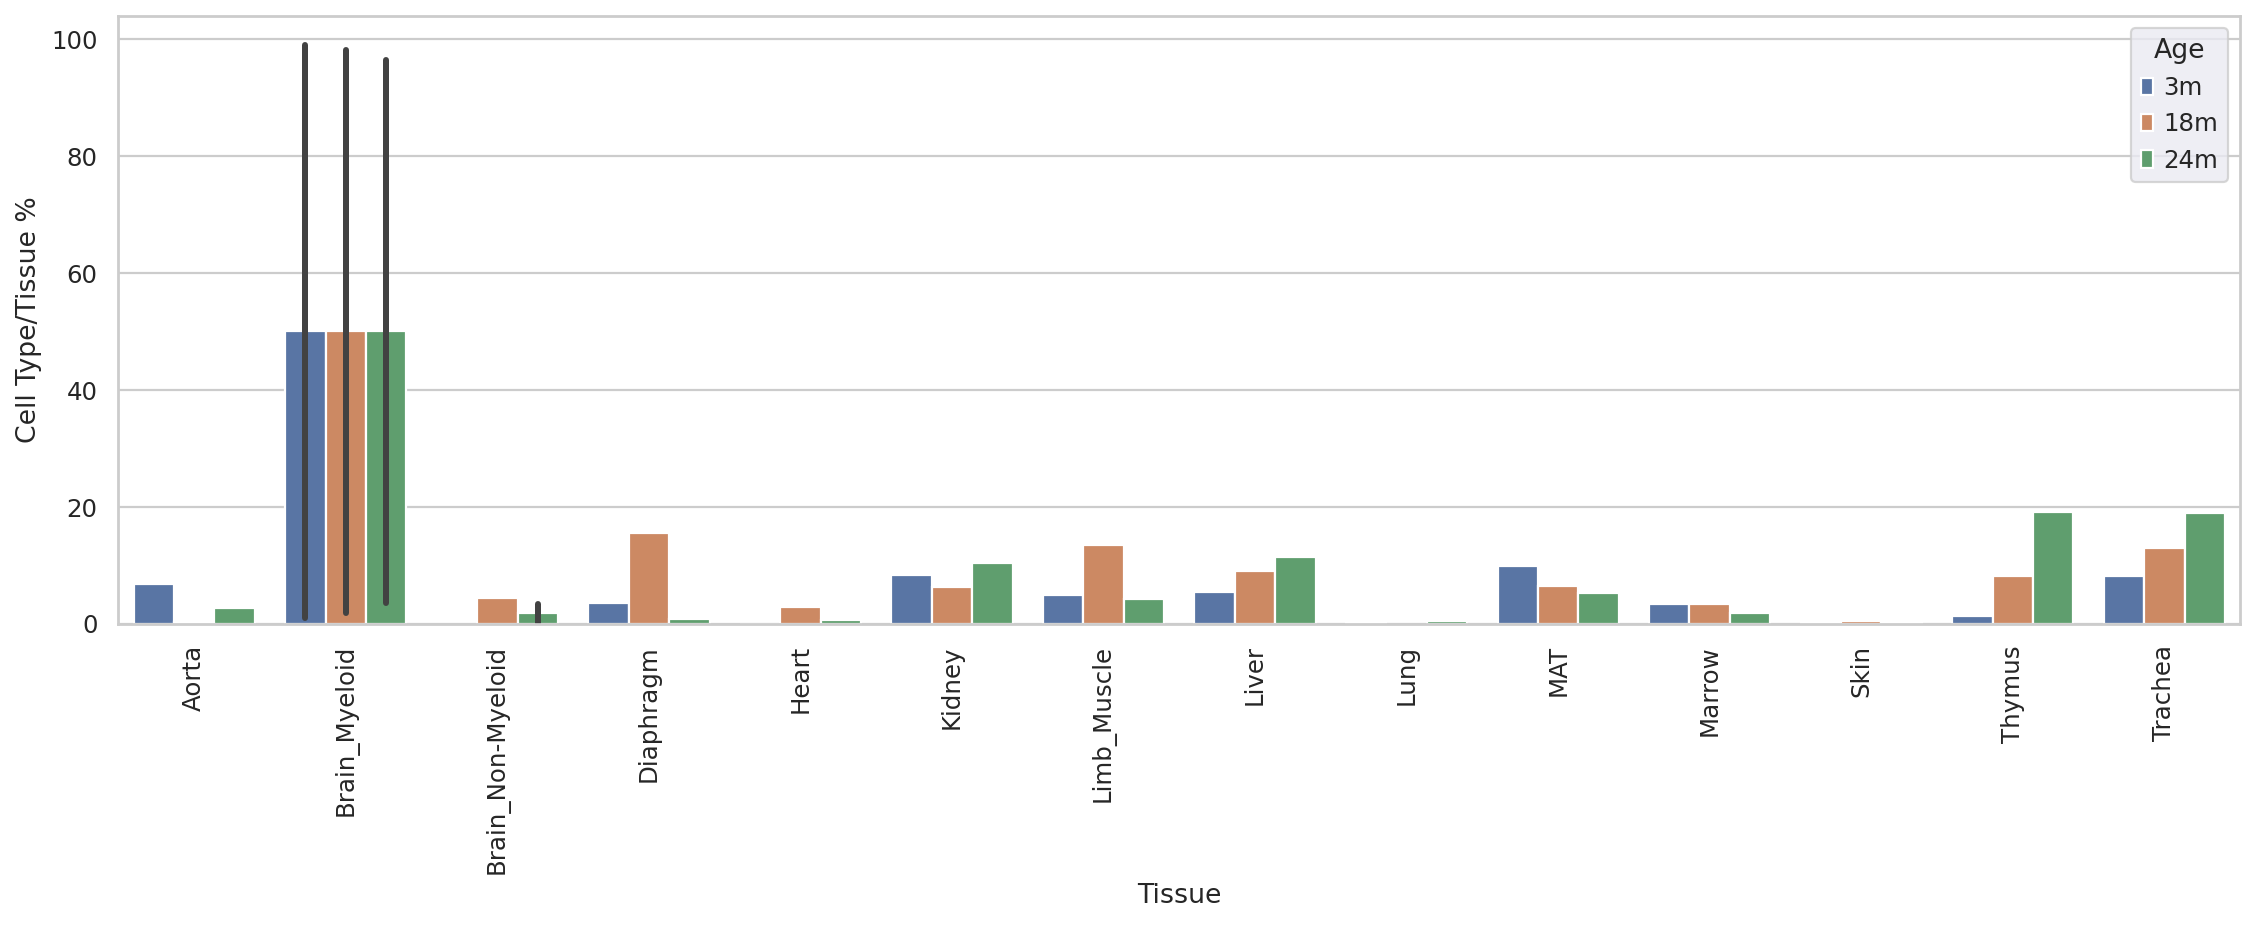

In [34]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(17, 5))
plt.xticks(rotation=90)
sns.set(font_scale =1)
#set_title("MT Expression Across Tissue & Age")
sns.barplot(y="Cell Type/Tissue %",x="Tissue",data=mac_in_tissues_DF, hue = "Age")

In [35]:
#mt-Atp6
adata_mtAtp6 = adata[:,'mt-Atp6'].copy() 
#subsets adata object by cells that have this gene. var=mt-Atp6
#AnnData object with n_obs × n_vars = 103180 × 1

adata_mtAtp6 = adata_mtAtp6[adata_mtAtp6.obs.cell_ontology_class=='macrophage'].copy() 
#now filtering to just macrophages
#Should loop through macrophages_in_tissues dictionary

adata_mtAtp6.obs["mt-Atp6"]=adata_mtAtp6.X #creates mt-Atp6 column!

adata_mtAtp6 = adata_mtAtp6.obs.copy()

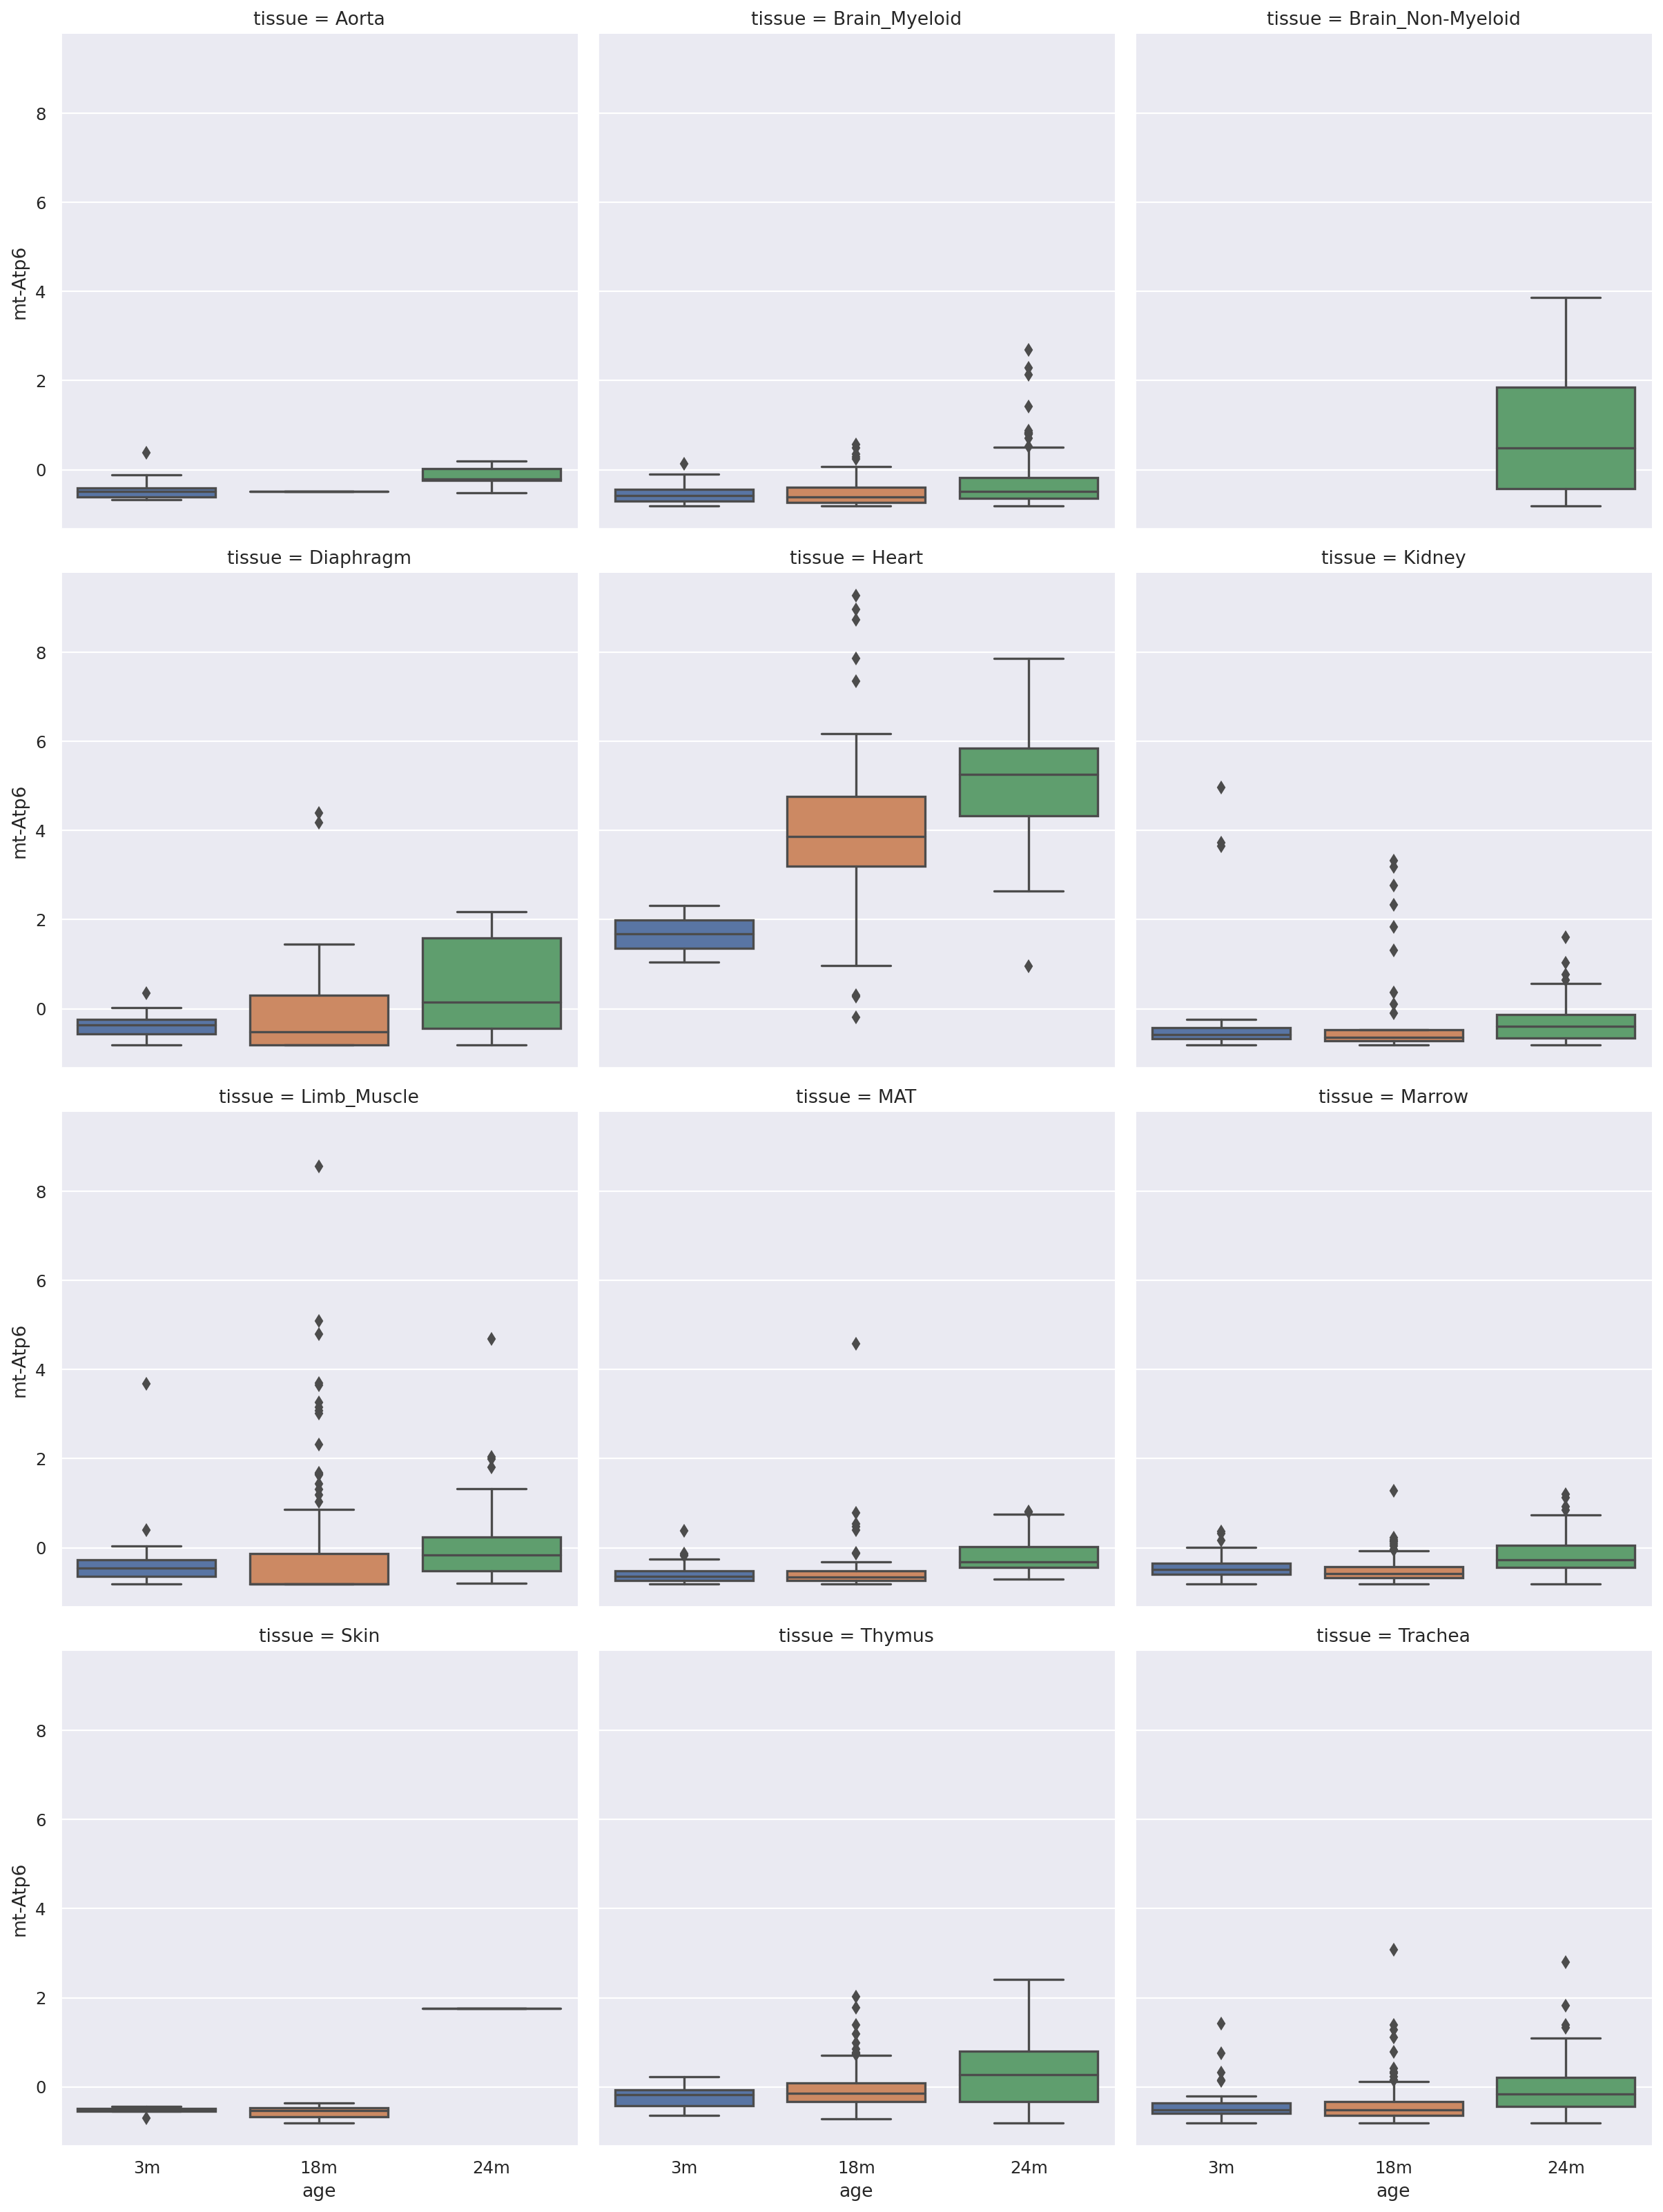

In [36]:
sns.catplot(data = adata_mtAtp6, x='age', y = 'mt-Atp6', col = 'tissue',col_wrap=3, kind = 'box')

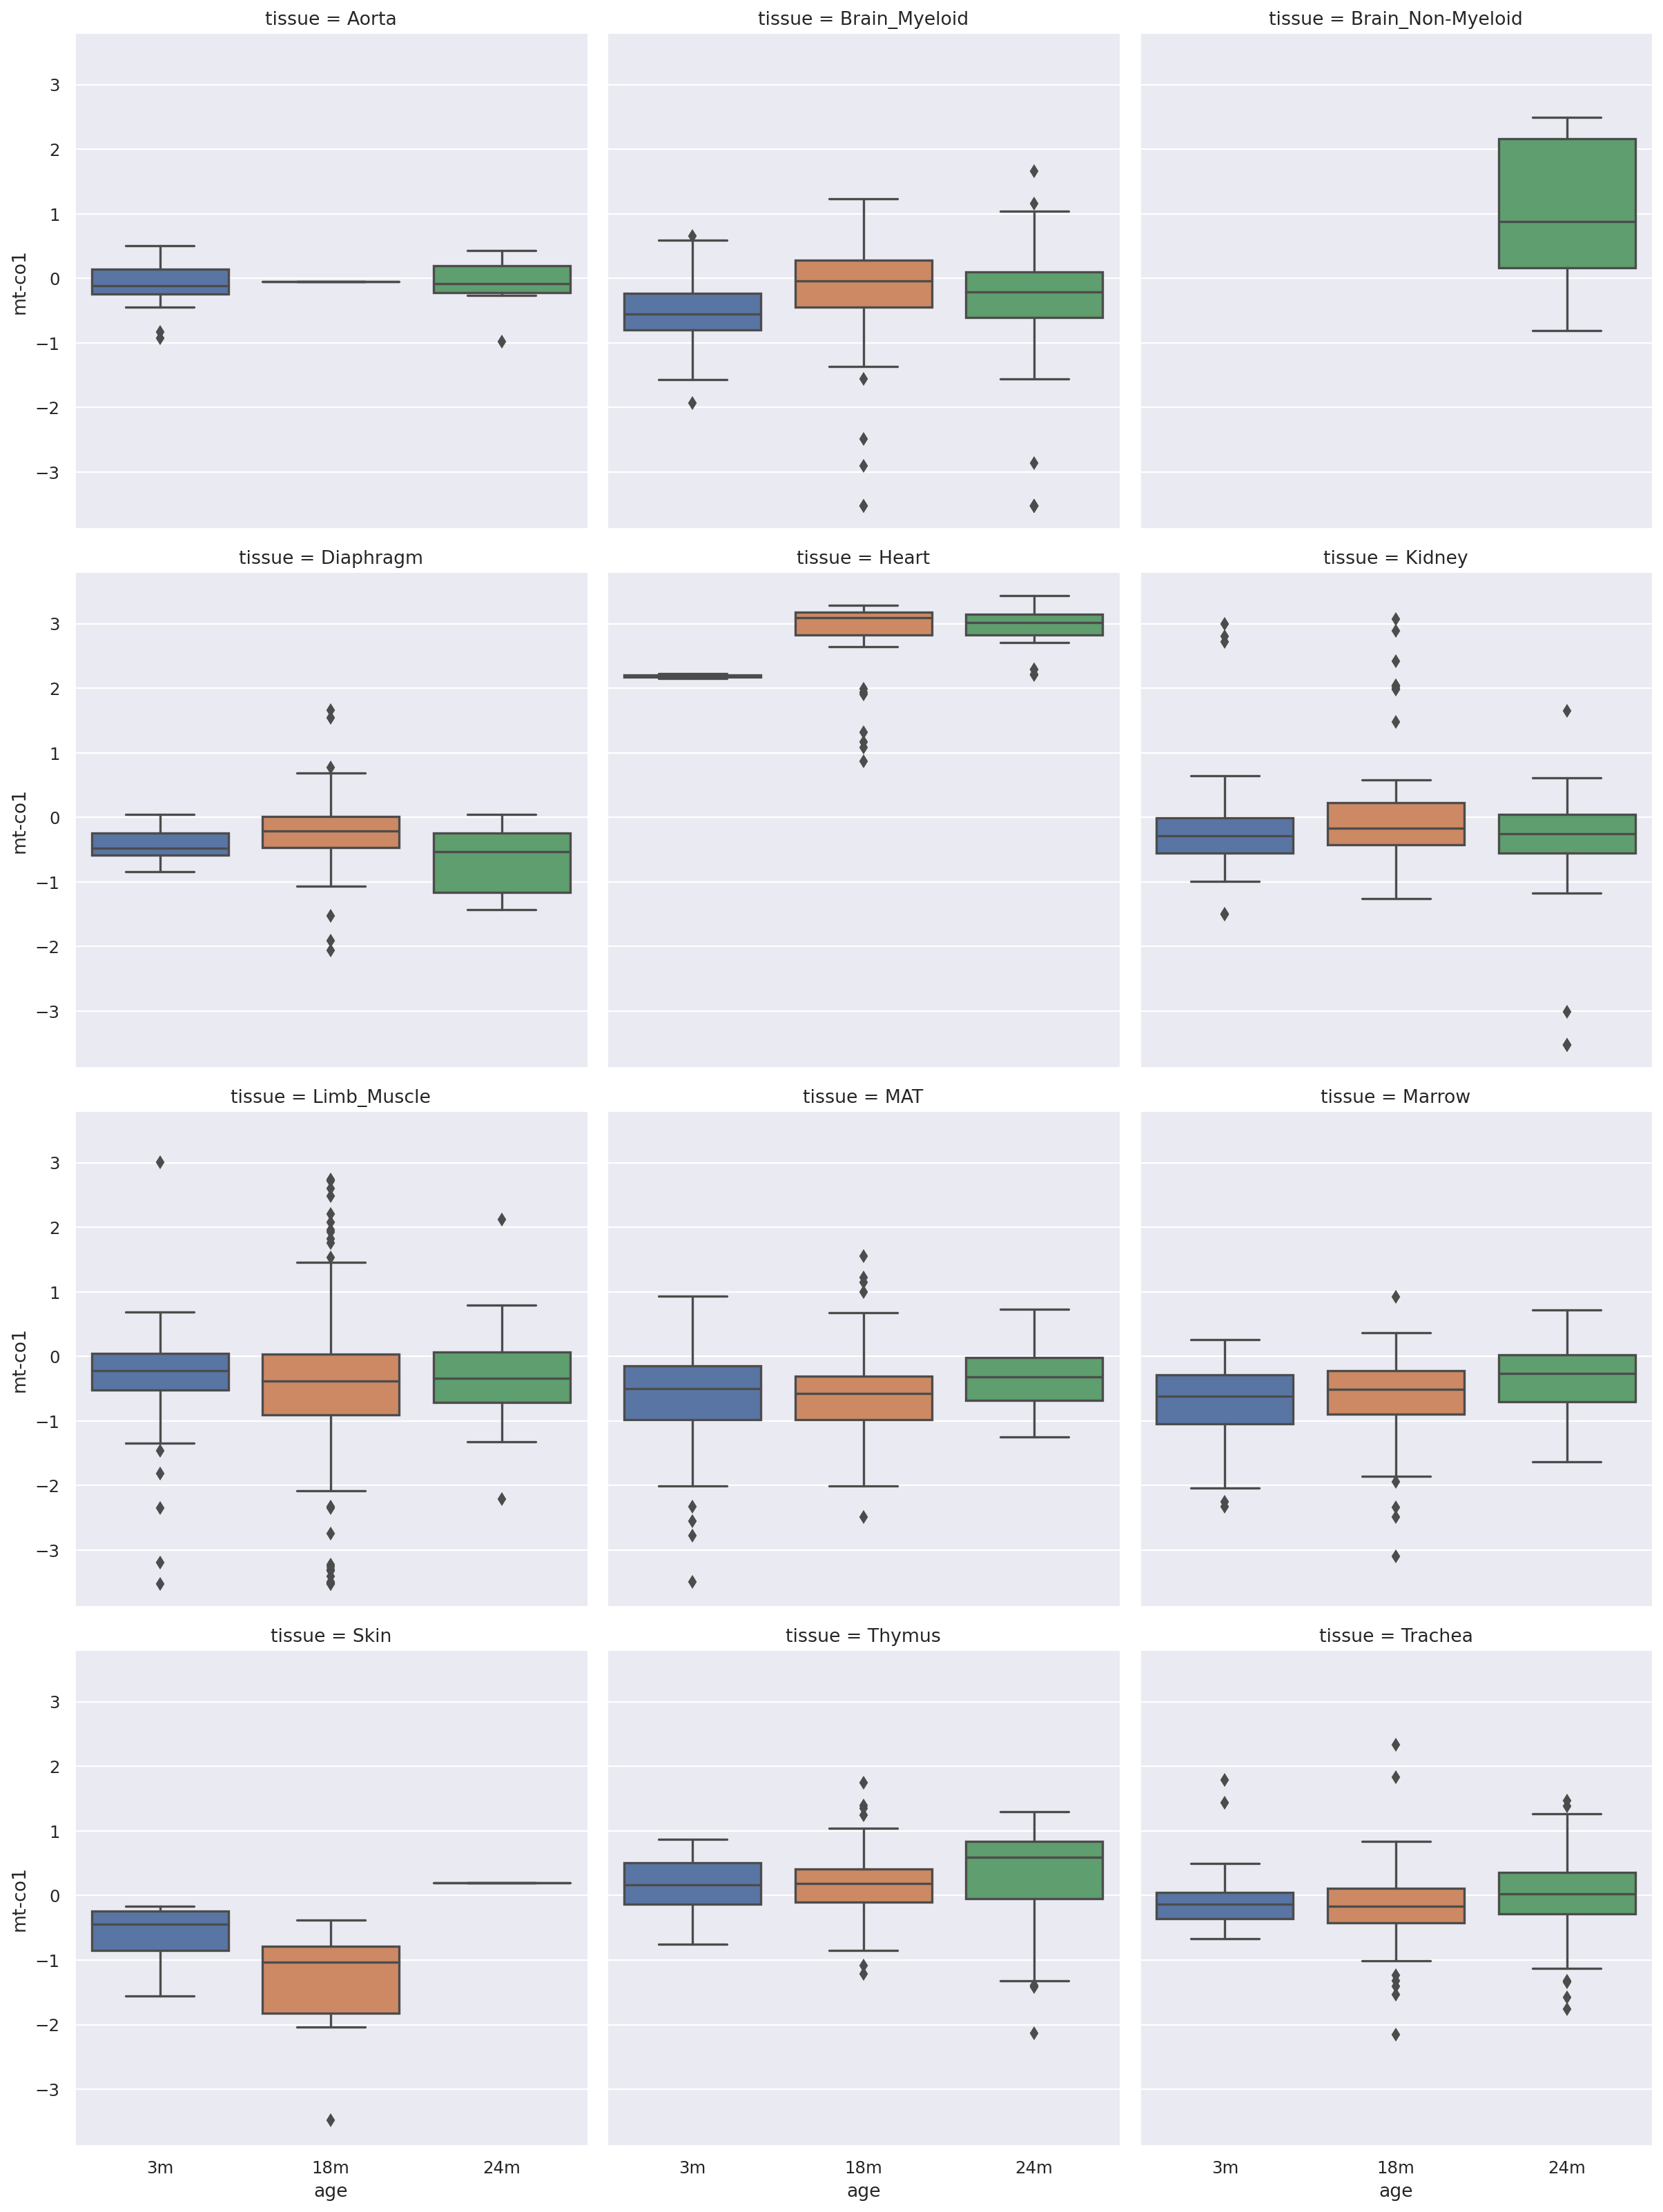

In [37]:
'''heart macropahges expressing mt-Co1 gene across ages'''
adata_co1 = adata[:,'mt-Co1'].copy() #only has this gene
#adata_co1 = adata_co1[adata_co1.obs.tissue=='Heart'].copy() .isin(mt_nc_genes)
adata_co1 = adata_co1[adata_co1.obs.cell_ontology_class=='macrophage'].copy()
adata_co1.obs["mt-co1"]=adata_co1.X #.var index for loop and subsets for just mt gene & create column w/gene name = .X
adata_co1 = adata_co1.obs.copy()

#seaborn graph wrap arguement for 3/row
sns.catplot(data = adata_co1, x='age', y = 'mt-co1', col = 'tissue',col_wrap=3, kind = 'box')